==============================================================================================
# Practicum 6 - Part 2

==============================================================================================

## Delivery

Up to **1 point out of 10** will be penalized if the following requirements are not fulfilled:

- Implemented code should be commented.

- The questions introduced in the exercises must be answered.

- Add title to the figures to explain what is displayed.

- Comments need to be in **english**.

- The deliverable must be a file named **P6_Student1_Student2.zip** that includes:
    - The notebook P6_2_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.
    - All the images used in this notebook.

**Deadline (Group A- Group F): December 23th, 23:00 h**

**Deadline (Group B): December 24th, 23:00 h**

==============================================================================================
## Dimensionality reduction and face detection
==============================================================================================

**Problem to solve**: Define a space of image feature that allows to represent objects based on their appearance or a set of local features in the image.

Documentation [Face recognition skimage](https://scikit-learn.org/stable/auto_examples/applications/plot_face_recognition.html)

==============================================================================================


Today's exercices will practise the following:

1. Define an appropiate representation (descriptors objects):
    - Normally, reduce size of the data preserving the invariance and removing redundant dimensions.


2. Train a classifier from a set of examples with their descriptors.


3. Recognize a new face example using the learned model.

## Imports

In [44]:
from time import time

import numpy as np
from numpy import unique
import matplotlib.pyplot as plt


## Principal Component Analysis (PCA)

### Dimensionality and redundancy

Imagine we have a dataset with 100x100 pixel images, it means we have 10000 dimensions. We want to construct a low-dimensional linear subspace that best explains the variation in the set of face images (**Eigenfaces space**)

<img src="notebook_images/subspace.PNG" width=200, height=200>

Each image has m rows and n columns and defines a vector of (mxn) elements. We need to choose the most valuable pixels in order to avoid compute all dimensions. 

<img src="notebook_images/feature_vector.PNG" width=800, height=400>

We look for a transformation of the original space to a smaller (M << (mxn)) where faces are represented with their coordinates in this new space R.

To reduce the dimensionality retaining the information necessary to classify and recognize, we are going to use the **Eigenfaces method** 

### How to build a reduced space?

To build this new space, we are going to use the **Principal Component Analysis**. Given a large space, the PCA looks for the minimum number of axes that best represents the variation of the data.

<img src="notebook_images/pca.PNG" width=400, height=400>

The eigenvectors of the covariance matrix define the axis of maximum variance and the eigenvalues give a measure of the variance of the data. 

1. Construct the vector in the (m x n)-dimensional space R given M images of size (m x n).

2. Compute the mean image 

<center>
$\overline{X}=\frac{1}{M}\sum_{i=1}^{M} X_i$
</center>

3. Construct the covariance matrix. Due to $A \times A^T$ is too large, instead of using $A \times A^T$ to compute its eigenvectors, we are going to compute the eigenvectors of $A^T \times A$.

<img src="notebook_images/covariance_image.PNG" width=500, height=500>

4. Extract the eigenvectors (the base of the new space) and their eigenvalues and project faces in the new space to apply the classifier (knn)


### 1. Load and prepare data

Let's use the [Labeled Faces in the Wild (LFW)](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_lfw_people.html) people dataset (classification).

Face dataset features:

- Classes: 5749

- Samples total: 13233

- Dimensionality: 5828

- Features: real, between 0 and 255


*sklearn.datasets.fetch_lfw_people(data_home=None, funneled=True, resize=0.5, min_faces_per_person=0, color=False, slice_=(slice(70, 195, None), slice(78, 172, None)), download_if_missing=True, return_X_y=False)*



*Please, check the parameters and returned value by ``lethc_lfw_people()`` before continuing.*

**1.1** Load the dataset.

Obtain only those cases where there are, at least, 100 images. Check the final number of images, image shapes and labels of the images.

In [45]:
# Load the dataset
from sklearn.datasets import fetch_lfw_people 

# Your solution here
lfw_people = fetch_lfw_people(min_faces_per_person=100, resize=0.4)

In [46]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=5):#function given on the example code
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

**1.2** Plot an image frome each example, with its name as the title of the image.

<img src="notebook_images/example.png" width=500, height=500>

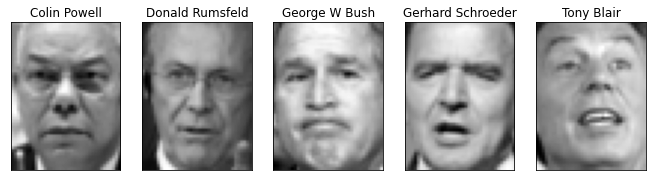

In [47]:
images = [lfw_people.images[5], lfw_people.images[2],lfw_people.images[0], lfw_people.images[1], lfw_people.images[3]]
titles = lfw_people.target_names
n_samples, h, w = lfw_people.images.shape
plot_gallery(images, titles, h, w, n_row=1, n_col=5)

**1.3** Divide the dataset into train and test set (0.7/0.3). 

**Hint:** use the train_test_split function.

In [48]:
# Split dataset into training and test
from sklearn.model_selection import train_test_split 

# Your solution here
X = lfw_people.data
y = lfw_people.target #the label to predict is the id of the person

# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 2. Compute PCA

[*class sklearn.decomposition.PCA(n_components=None, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)*](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html?highlight=pca#sklearn.decomposition.PCA)

The principal components measure deviations about this mean along orthogonal axes.


**2.1** Create a PCA object, using the training set and a 150 components

In [49]:
# Principal component analysis
from sklearn.decomposition import PCA

# Your solution here
pca = PCA(n_components=150, svd_solver="randomized", whiten=True).fit(X_train)

Plot the accumated variance of the components. 

**Hint:** Use the returned `explained_variance_ratio_`.

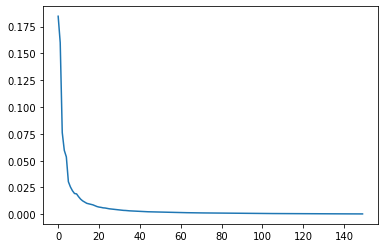

In [50]:
# Your solution here
plt.plot(pca.explained_variance_ratio_)

What is the variable *pca*?

In [ ]:
# Your solution here
"""
Principal component analysis (PCA), is a tecnique for data reduction

Basically we are computing a PCA (eigenfaces) on the face dataset, treated as unlabeled dataset,
unsupervised feature extraction / dimensionality reduction, and we return an Object that contains a lot of attributes
"""

**2.2** One interesting part of PCA is that it computes the average face, which can be interesting to examine. 

Plot the average face, using the method `mean_` of the PCA object.

**Hint:** The average face need to be reshaped in order to visualize it properly

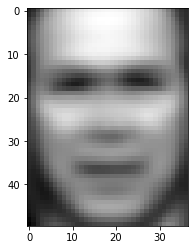

In [51]:
# Your solution here
plt.imshow(pca.mean_.reshape(h,w), cmap=plt.cm.gray) 

**2.3** Furhtermore, we can check all the principal components (i.e. eigenfaces) considering the corresponding importance.

Visualize 30 principal eigenfaces

<img src="notebook_images/eigenfaces.png" width=500, height=500>

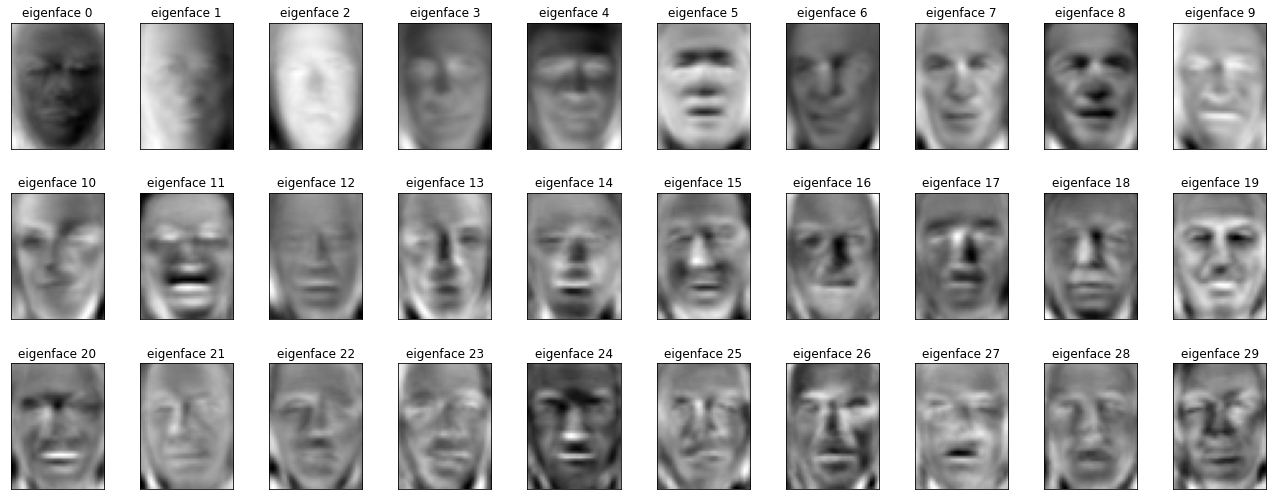

In [52]:
# Your solution here
eigenfaces = pca.components_.reshape((150, h, w))
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w, n_row=3, n_col=10)

Note that the base components are ordered by their importance. We see that the first few components seem to primarily take care of lighting conditions; the remaining components pull out certain identifying features: the nose, eyes, eyebrows, etc.

**2.4** Project both the training and test set onto the PCA basis, using the method `transform()` of the PCA object.

In [53]:
# Your solution here
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

DO you need to apply the same to the variable y?

In [ ]:
# Your solution here
#no because y_test contains the category labels to test accuracy, which should not need to change, 
#we can see that we have no shape issues using the same variables, unlike with X

**2.5**  These projected components correspond to factors in a linear combination of component images such that the combination approaches the original face. 

Choose one of the images and try to recompose from its first 10 most important corresponding eigenfaces.


<br/>
<img src="notebook_images/eigenfaces_image.PNG" width=300, height=300>


In [ ]:
# Your solution here

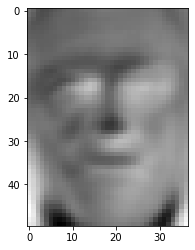

In [54]:
#Attempt 1
new_img = np.zeros(h*w)
for i in range(10):
    new_img = new_img[:] + X_test_pca[0,i] * pca.components_[i]

plt.imshow(new_img.reshape(h,w), cmap=plt.cm.gray)
#this one works if we use 150 componets, but i think its kinda off, so im making a different attempt

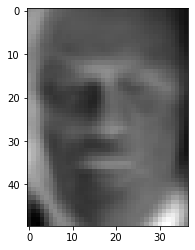

In [55]:
#Attempt 2
img = X_train_pca[0][:10]
new_img = np.dot(img, pca.components_[:10, :]) # inverse_transform using 10 components

plt.imshow(new_img.reshape(h,w), cmap=plt.cm.gray)

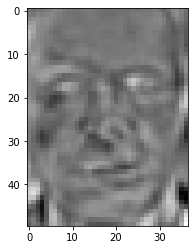

In [56]:
#we know it is correct because if we use all components we get a similar but more defined picture
img = X_train_pca[0]
new_img = np.dot(img, pca.components_) # inverse_transform using 10 components

plt.imshow(new_img.reshape(h,w), cmap=plt.cm.gray)

What is the purpose of the PCA tool?

In [ ]:
# Your solution here
"""
the overall objective is to reduce the dimensions of the datasets, increasing interpretability but at the same time 
minimizing information loss. With the inverse transform we attempt to recover the reduced information, which can be used
to confirm wether the reduction of information was accurate or not.
"""

### 3. Train a classifier

**3.1** Train an Adaboost classifier using the PCA features. Show the results obtained with the test set.
Use the `score` method of the Adaboost model.

In [57]:
# Train a Adaboost classifier
from sklearn.ensemble import AdaBoostClassifier

# Your solution here
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_train_pca, y_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [58]:
clf.predict(X_test_pca)
clf.score(X_test_pca, y_test)

0.6140350877192983

**3.2** We can quantify this effectiveness using one of several measures from sklearn.metrics. First we can do the classification report, which shows the precision, recall and other measures of the “goodness” of the classification.

*sklearn.metrics.classification_report(y_true, y_pred, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')*

*Please, check the parameters and returned value by ``classification_report()`` before continuing.*

Print the classification report obtained during the training of the Adaboost model.

In [59]:
# Classification and results
from sklearn.metrics import classification_report 

# Your solution here
pred_pca = clf.predict(X_test_pca)
print(classification_report(y_test, pred_pca, target_names=titles,labels=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn'))

                   precision    recall  f1-score   support

     Colin Powell       0.67      0.51      0.58        78
  Donald Rumsfeld       0.67      0.37      0.47        38
    George W Bush       0.62      0.84      0.71       159
Gerhard Schroeder       0.50      0.07      0.12        30
       Tony Blair       0.49      0.57      0.53        37

         accuracy                           0.61       342
        macro avg       0.59      0.47      0.48       342
     weighted avg       0.61      0.61      0.58       342



Please, explaing what is:
- accuracy (score)
- precision
- recall
- f1-score
- support
- macro avg
- weighted avg?


In [ ]:
# Your explanation here
"""
Accuracy classification score computes subset accuracy: the set of labels predicted for a sample must exactly 
match the corresponding set of labels in y_true, which is the y_test in this case.

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives.
The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives.
The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score weights recall more than precision by a factor of beta. 
beta == 1.0 means recall and precision are equally important.
So F-1 score is basically the harmonic mean between precision & recall

The support is the number of occurrences of each class in y_true.

macro avg is not weighted, averaging the unweighted mean per label

weighted avg, weighted average is precision of all classes merge together, averaging the support-weighted mean per label
"""

**3.3** Train an Adaboost classifier, without PCA, using the training set. Show the results using the `score` method of the Adaboost model and the corresponding classification report.

In [60]:
# Train a Adaboost classifier
from sklearn.ensemble import AdaBoostClassifier

# Your solution here
clf2 = AdaBoostClassifier(n_estimators=100, random_state=0)
clf2.fit(X_train, y_train)
clf2.predict(X_test)
clf2.score(X_test, y_test)

0.6549707602339181

In [61]:
pred = clf2.predict(X_test)
print(classification_report(y_test, pred, target_names=titles,labels=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn'))

                   precision    recall  f1-score   support

     Colin Powell       0.79      0.64      0.71        78
  Donald Rumsfeld       0.71      0.26      0.38        38
    George W Bush       0.63      0.88      0.74       159
Gerhard Schroeder       0.86      0.20      0.32        30
       Tony Blair       0.49      0.49      0.49        37

         accuracy                           0.65       342
        macro avg       0.70      0.49      0.53       342
     weighted avg       0.68      0.65      0.63       342



**Questions**

- Does computing time change using PCA? How?
- Which of both (with and without PCA) does give better results?
- How does the result change if we change the number of components in PCA?
- How does the result change if we change the number of estimators in the Adaboost?

In [ ]:
# Your answer here
"""
Does computing time change using PCA? How?
Yes, but its fairly similar. Although I believe the one that uses PCA takes a little longer

Which of both (with and without PCA) does give better results?
Without PCA seems to give slightly better scores

How does the result change if we change the number of components in PCA?
I will try this in the optional

How does the result change if we change the number of estimators in the Adaboost?
"""

In [62]:
#How does the result change if we change the number of estimators in the Adaboost?
# Your solution here
clf3 = AdaBoostClassifier(n_estimators=150, random_state=0)
clf3.fit(X_train, y_train)
clf3.predict(X_test)
clf3.score(X_test, y_test)

0.652046783625731

In [63]:
pred3 = clf3.predict(X_test)
print(classification_report(y_test, pred3, target_names=titles,labels=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn'))

                   precision    recall  f1-score   support

     Colin Powell       0.91      0.50      0.64        78
  Donald Rumsfeld       0.69      0.29      0.41        38
    George W Bush       0.61      0.94      0.74       159
Gerhard Schroeder       0.71      0.17      0.27        30
       Tony Blair       0.56      0.49      0.52        37

         accuracy                           0.65       342
        macro avg       0.70      0.48      0.52       342
     weighted avg       0.69      0.65      0.62       342



In [ ]:
"""
we can see that without PCA, if we change the n_estimator to 150 or 200 we get a very slighty worse score, but curiously
the precision for some improve while other worsen. For example the precision for Colin Powell improves from .79 to .91
while de precision for Gerhard Schroeder decreases from .81 to .71. If we use n_estimator = 50 the score remains fairly similar,
but the improvement in precision worsens and the decrease in precision also worsens.
"""

In [64]:
clf4 = AdaBoostClassifier(n_estimators=150, random_state=0)
clf4.fit(X_train_pca, y_train)
clf4.predict(X_test_pca)
clf4.score(X_test_pca, y_test)

0.6169590643274854

In [65]:
pred = clf4.predict(X_test_pca)
print(classification_report(y_test, pred, target_names=titles,labels=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn'))

                   precision    recall  f1-score   support

     Colin Powell       0.68      0.53      0.59        78
  Donald Rumsfeld       0.72      0.34      0.46        38
    George W Bush       0.61      0.83      0.70       159
Gerhard Schroeder       0.43      0.10      0.16        30
       Tony Blair       0.54      0.59      0.56        37

         accuracy                           0.62       342
        macro avg       0.60      0.48      0.50       342
     weighted avg       0.62      0.62      0.59       342



In [ ]:
"""
we can see that using the PCA, if we use n_estimators = 150 both the scores and the precision for all cases improve by decimals
although the improvement in score is overall better than the one we see without using PCA. Curiusly enough, if we use 
n_estimators = 50 both the score and the precision worsen by a couple decimals too, but it seems more drastic. 
"""

**3.5 (Optional)** Repeat the experiment using a different number of components. 

For instance, instead of using 150 components, try using 10, 25, 50, 200, 500... at your election. These numbers are just orientative. 

- How much variance is acummulated using the different number of components.
- The result is better using... how many components? 
- Does time change using a different numbero of components?

In [66]:
# Your solution here
pca2 = PCA(n_components=500, svd_solver="randomized", whiten=True).fit(X_train)
X_train_pca2 = pca2.transform(X_train)
X_test_pca2 = pca2.transform(X_test)

In [67]:
clf5 = AdaBoostClassifier(n_estimators=150, random_state=0)
clf5.fit(X_train_pca2, y_train)
clf5.predict(X_test_pca2)
clf5.score(X_test_pca2, y_test)

0.5146198830409356

In [68]:
pred = clf5.predict(X_test_pca2)
print(classification_report(y_test, pred, target_names=titles,labels=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn'))

                   precision    recall  f1-score   support

     Colin Powell       0.43      0.35      0.38        78
  Donald Rumsfeld       0.61      0.37      0.46        38
    George W Bush       0.54      0.76      0.63       159
Gerhard Schroeder       0.33      0.03      0.06        30
       Tony Blair       0.46      0.35      0.40        37

         accuracy                           0.51       342
        macro avg       0.47      0.37      0.39       342
     weighted avg       0.49      0.51      0.48       342



In [ ]:
"""
We can see that if we increase the number of components, we get worse scores and precision results, we can see this if we
use 200 or 500 components. If we instead use less components, like 50, the score reaims fairly similiar, sometimes it improves
but I think the results are inaccurate while using more components is more realistic, but maybe at some point it could be 
overfitting. 
"""

### 4. Recognize a new face example using the learned model

**4.1** Try your both models using the test set. 

Predict the labels using the Adaboost model, with and without PCA, and plot the images with the corresponding label as title.

<img src="notebook_images/prediction.png" width=300 height = 300>

                   precision    recall  f1-score   support

     Colin Powell       0.67      0.51      0.58        78
  Donald Rumsfeld       0.67      0.37      0.47        38
    George W Bush       0.62      0.84      0.71       159
Gerhard Schroeder       0.50      0.07      0.12        30
       Tony Blair       0.49      0.57      0.53        37

         accuracy                           0.61       342
        macro avg       0.59      0.47      0.48       342
     weighted avg       0.61      0.61      0.58       342



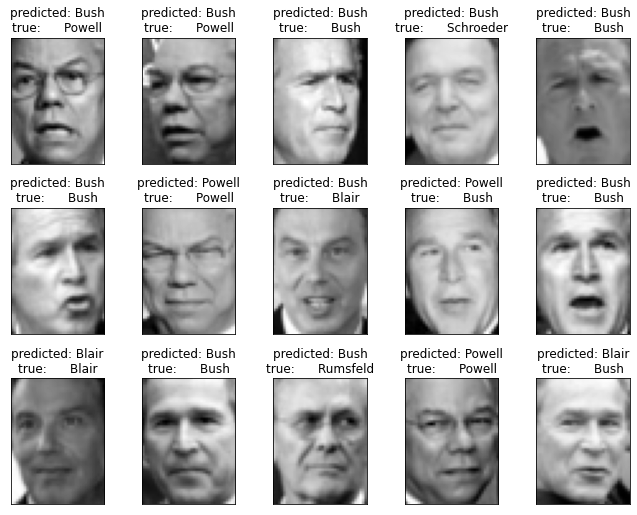

In [69]:
# Your solution here
y_pred = clf.predict(X_test_pca) #using the PCA test and classifier

print(classification_report(y_test, y_pred, target_names=titles))

# plot the result of the prediction on a portion of the test set
def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(" ", 1)[-1]
    true_name = target_names[y_test[i]].rsplit(" ", 1)[-1]
    return "predicted: %s\ntrue:      %s" % (pred_name, true_name)


prediction_titles = [
    title(y_pred, y_test, titles, i) for i in range(y_pred.shape[0])
]

plot_gallery(X_test, prediction_titles, h, w)


                   precision    recall  f1-score   support

     Colin Powell       0.79      0.64      0.71        78
  Donald Rumsfeld       0.71      0.26      0.38        38
    George W Bush       0.63      0.88      0.74       159
Gerhard Schroeder       0.86      0.20      0.32        30
       Tony Blair       0.49      0.49      0.49        37

         accuracy                           0.65       342
        macro avg       0.70      0.49      0.53       342
     weighted avg       0.68      0.65      0.63       342



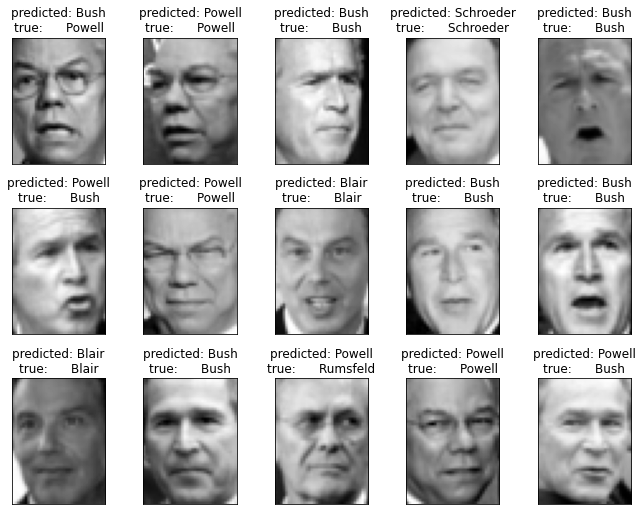

In [70]:
# Your solution here
y_pred2 = clf2.predict(X_test) #Without PCA

print(classification_report(y_test, y_pred2, target_names=titles))

# plot the result of the prediction on a portion of the test set
def title(y_pred2, y_test, target_names, i):
    pred_name = target_names[y_pred2[i]].rsplit(" ", 1)[-1]
    true_name = target_names[y_test[i]].rsplit(" ", 1)[-1]
    return "predicted: %s\ntrue:      %s" % (pred_name, true_name)


prediction_titles = [
    title(y_pred2, y_test, titles, i) for i in range(y_pred2.shape[0])
]

plot_gallery(X_test, prediction_titles, h, w)

Which model makes the predictions betters? Try different parameters.

In [ ]:
"""
It appears without PCA gives better results even if we try changing the number of n_estimators, like we have seen in previous
question. Still, we can see that each methods do a very good job at making the correct predictions. 
"""